In [2]:
import numpy as np
import numpy.linalg as lng
import matplotlib.pyplot as plt
import pandas as pd
import rdkit

Space generation

In [3]:
M, N = 1_000, 300
np.random.seed(42)
vectors = np.random.rand(M, N)
vectors[0].shape

(300,)

Basis generation

In [4]:
basis = np.eye(N)
basis[0].shape

(300,)

Let's find basis coefficients for every vector from `vector`.

In [5]:
c = lng.inv(basis) @ vectors.T
c = c.T

In [63]:
x, y, z = vectors[0], vectors[1], vectors[2]
c_x, c_y, c_z = c[0], c[1], c[2]
lng.norm(x - y), lng.norm(c_x - c_y)

(7.665058170563515, 7.665058170563515)

RDKit

In [20]:
from rdkit import Chem
from rdkit.Chem import DataStructs

# Function to compute Tanimoto similarity
def compute_tanimoto_similarity(smi1, smi2):
    # Convert SMILES strings to RDKit molecules
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    
    if not mol1 or not mol2:
        raise ValueError("Invalid SMILES string(s).")
    
    # Generate Morgan fingerprints (ECFP4)
    fp1 = Chem.RDKFingerprint(mol1, maxPath=15)
    fp2 = Chem.RDKFingerprint(mol2, maxPath=15)
    
    # Compute Tanimoto similarity
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
    return similarity

# Example usage
smi_file1 = "CCO"  # Replace with your first SMILES string
smi_file2 = "CCN"  # Replace with your second SMILES string

similarity = compute_tanimoto_similarity(smi_file1, smi_file2)
print(f"Tanimoto Similarity: {similarity}")

Tanimoto Similarity: 0.2


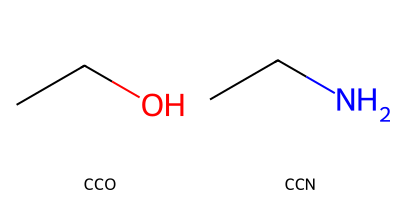

In [21]:
from rdkit import Chem
from rdkit.Chem import Draw

# List of SMILES strings
smiles_list = [smi_file1, smi_file2]

# Convert SMILES to Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Display molecules in a grid
img = Draw.MolsToGridImage(mols, molsPerRow=len(smiles_list), subImgSize=(200, 200), legends=["CCO", "CCN"])
img

In [22]:
smi_1 = "[H]N[C@@H]([C@@H](C)CC)C(=O)NCC(O)=O"
smi_2 = "[H]N1CCC[C@H]1C(=O)N[C@@H](CC(N)=O)C(O)=O"
similarity = compute_tanimoto_similarity(smi_1, smi_2)
print(f"Tanimoto Similarity: {similarity}")

Tanimoto Similarity: 0.2267080745341615


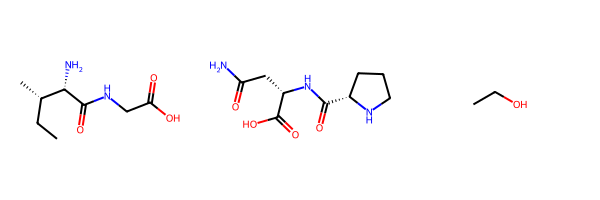

In [23]:
# List of SMILES strings
smi_3 = 'CCO'
smiles_list = [smi_1, smi_2, smi_3]

# Convert SMILES to Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Display molecules in a grid
img = Draw.MolsToGridImage(mols, molsPerRow=len(smiles_list), subImgSize=(200, 200))
img

In [33]:
def draw_list_smiles(list_smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
    img = Draw.MolsToGridImage(mols, molsPerRow=3,
                             subImgSize=(200, 200), legends=[f"SMILES {i}" for i in range(len(list_smiles))])
    return img

In [26]:
smiles_list = [
                "CCO", "CCN",
                "[H]N[C@@H]([C@@H](C)CC)C(=O)NCC(O)=O", 
                "[H]N1CCC[C@H]1C(=O)N[C@@H](CC(N)=O)C(O)=O"
                ]  # Replace with your list of SMILES strings

In [62]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
fingerprints = [Chem.RDKFingerprint(mol, maxPath=15) for mol in mols]
x = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fingerprints[0], x)
np.sum((x != 0))

6

In [51]:
from rdkit import Chem
from rdkit.Chem import DataStructs, Draw
from itertools import combinations

# Function to compute Tanimoto similarity for all pairs in a list of SMILES
def compute_tanimoto_similarity_for_pairs(smiles_list):
    # Convert SMILES strings to RDKit Mol objects
    mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
    
    # Filter out invalid SMILES
    valid_mols = [mol for mol in mols if mol is not None]
    if len(valid_mols) < len(mols):
        print("Warning: Some SMILES strings were invalid and skipped.")
    
    # Generate fingerprints for all valid molecules
    fingerprints = [Chem.RDKFingerprint(mol, maxPath=15) for mol in valid_mols]
    
    # Compute Tanimoto similarity for all unique pairs
    similarity_matrix = {}
    for (i, fp1), (j, fp2) in combinations(enumerate(fingerprints), 2):
        similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
        similarity_matrix[(i, j)] = similarity
        print(f"Tanimoto similarity between SMILES {i} and {j}: {similarity}")

    return similarity_matrix

# Example usage

similarity_matrix = compute_tanimoto_similarity_for_pairs(smiles_list)

Tanimoto similarity between SMILES 0 and 1: 0.2
Tanimoto similarity between SMILES 0 and 2: 0.017964071856287425
Tanimoto similarity between SMILES 0 and 3: 0.004815409309791332
Tanimoto similarity between SMILES 1 and 2: 0.017964071856287425
Tanimoto similarity between SMILES 1 and 3: 0.004815409309791332
Tanimoto similarity between SMILES 2 and 3: 0.2267080745341615


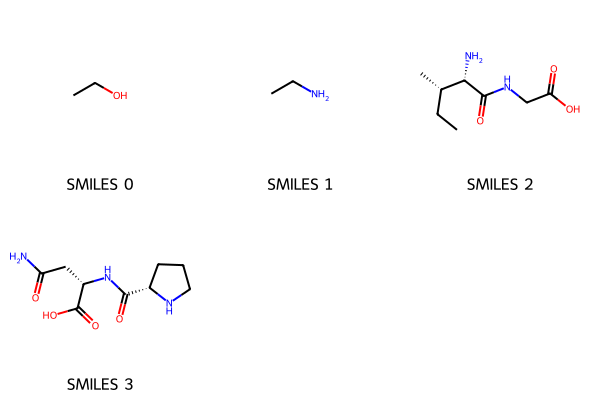

In [52]:
img = draw_list_smiles(smiles_list)
img